In [ ]:
#Srushti Samant

#IST 707

#HW8 AML


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
import itertools

##DATA PREPROCESSING STEPS

Once we receive the data we need to first & foremost clean the data, need to get rid of un-useful parts of the data. Like removing unwanted noise, removing punctuations marks, removing split words, typo errors, removing URLs, lower casing, etc.
Tokenization, Stemming, Lemmatization, and removing unwanted spaces between the words are necessary. This cleaning process is called Preprocessing Technique, and once the data is preprocessed a machine learning model can be built.


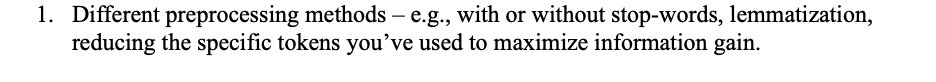




In [ ]:
#When there is insufficient data in any of the rows, the tokenizing error will occur.
#You can skip such invalid rows by using the err_bad_line parameter within the read_csv () method.
#dropna() is used to remove the null values from the dataset

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
df= pd.read_csv('deception_data_converted_FINAL.csv')
df=df.fillna('')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df.columns

Index(['lie', 'sentiment', 'review', 'review _1', 'review _2', 'review _3',
       'review _4', 'review _5', 'review _6', 'review _7', 'review _8',
       'review _9', 'review _10', 'review _11', 'review _12', 'review _13',
       'review _14', 'review _15', 'review _16', 'review _17', 'review _18',
       'review _19', 'review _20', 'review _21', 'review _22', 'review _23'],
      dtype='object')

In [ ]:
df['review'] = df[['review', 'review _1', 'review _2', 'review _3',
       'review _4', 'review _5', 'review _6', 'review _7', 'review _8',
       'review _9', 'review _10', 'review _11', 'review _12', 'review _13',
       'review _14', 'review _15', 'review _16', 'review _17', 'review _18',
       'review _19', 'review _20', 'review _21', 'review _22', 'review _23']].apply(' '.join, axis=1)

In [ ]:
df=df.drop(['review _1', 'review _2', 'review _3',
       'review _4', 'review _5', 'review _6', 'review _7', 'review _8',
       'review _9', 'review _10', 'review _11', 'review _12', 'review _13',
       'review _14', 'review _15', 'review _16', 'review _17', 'review _18',
       'review _19', 'review _20', 'review _21', 'review _22', 'review _23'],axis=1)

In [ ]:
df['review']=df.review.astype(str)


In [ ]:
'''sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["sentiment"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["sentiment"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["sentiment"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["sentiment"]]
df.head()'''

'sentiments = SentimentIntensityAnalyzer()\ndf["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["sentiment"]]\ndf["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["sentiment"]]\ndf["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["sentiment"]]\ndf[\'Compound\'] = [sentiments.polarity_scores(i)["compound"] for i in df["sentiment"]]\ndf.head()'

In [ ]:
'''score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment Type"] = sentiment
df.head()'''

'score = df["Compound"].values\nsentiment = []\nfor i in score:\n    if i >= 0.05 :\n        sentiment.append(\'Positive\')\n    elif i <= -0.05 :\n        sentiment.append(\'Negative\')\n    else:\n        sentiment.append(\'Neutral\')\ndf["Sentiment Type"] = sentiment\ndf.head()'

In [ ]:
'''print(df["Sentiment Type"].value_counts())'''

'print(df["Sentiment Type"].value_counts())'

In [ ]:
import re, string, unicodedata
import nltk
#import contractions
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
#from contractions import CONTRACTION_MAP
nltk.download('stopwords')
nltk.download('wordnet')
#The punkt module is a pre-trained model that helps you tokenize words and sentences
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

# non_ascii removal
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
#Convert all characters to lowercase from list of tokenized words
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

#punctuation and special character removal
def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words
#number removal
def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')


# stopword removal
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas


In [ ]:
def normalize_and_lemmaize(input):
    sample = remove_special_characters(input)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [ ]:
df['review_clean'] = df['review'].map(lambda text: normalize_and_lemmaize(text))
#review_clean column is the column for the reviews after the pre-processing steps have been performed


In [ ]:
df['review'].astype(str)

0     Mike\'s Pizza High Point NY Service was very s...
1     i really like this buffet restaurant in Marsha...
2     After I went shopping with some of my friend w...
3     Olive Oil Garden was very disappointing. I exp...
4     The Seven Heaven restaurant was never known fo...
                            ...                        
87    Pastablities is a locally owned restaurant in ...
88    I like the Pizza at Dominoes for their special...
89    It was a really amazing Japanese restaurant. T...
90    How do I even pick a best experience at Joe\'s...
91    My sister and I ate at this restaurant called ...
Name: review, Length: 92, dtype: object

In [ ]:
# Function for creating a column token
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature, we have generated tokens using df['token']
df['token'] = df['review'].astype(str).apply(token)

In [ ]:
df.head()

,lie,sentiment,review,review_clean,token
0,f,n,Mike\'s Pizza High Point NY Service was very s...,mikes pizza high point ny service slow quality...,"[Mike\, 's, Pizza, High, Point, NY, Service, w..."
1,f,n,i really like this buffet restaurant in Marsha...,really like buffet restaurant marshall street ...,"[i, really, like, this, buffet, restaurant, in..."
2,f,n,After I went shopping with some of my friend w...,go shop friend go dodo restaurant dinner find ...,"[After, I, went, shopping, with, some, of, my,..."
3,f,n,Olive Oil Garden was very disappointing. I exp...,olive oil garden disappoint expect good food g...,"[Olive, Oil, Garden, was, very, disappointing,..."
4,f,n,The Seven Heaven restaurant was never known fo...,seven heaven restaurant never know superior se...,"[The, Seven, Heaven, restaurant, was, never, k..."


In [ ]:
#Dividing the data into train and test dataframes

#Sentiment as Y_sentiment label and lie as Y_lie label

#X ie the review_clean column has been split into train and test

from sklearn.model_selection import train_test_split
X=df.review_clean
y_lie=df.lie
y_sentiment=df.sentiment
X_train, X_test, y_train_lie, y_test_lie = train_test_split(X, y_lie, test_size=0.25, random_state=42)
X_train, X_test, y_train_senti, y_test_senti = train_test_split(X, y_sentiment, test_size=0.25, random_state=42) 
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(69,)
Test Set Shape		:(23,)


In [ ]:
#plot_confusion_matrix function is used to plot a confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    ##Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt 


In [ ]:
#TfidfVectorizer vectorizer is used to convert textual data into numerical data


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

#This function is used to call SVM and Naive Bayes
def modeling(Model,y_train,y_test, Xtrain = tfidf_vect_train, Xtest =tfidf_vect_test ):
   
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
        
    return y_pred

def disp_confusion_matrix(y_pred,y_test,model_name,y_lable,vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    if y_lable =='lie':
      plot = plot_confusion_matrix(cm, classes=['Fake','True'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    else:
      plot = plot_confusion_matrix(cm, classes=['Negative','Positive'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

In [ ]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
from sklearn.naive_bayes import MultinomialNB
y_pred_nb_lie=modeling(MultinomialNB(),y_train_lie,y_test_lie, tfidf_vect_train, tfidf_vect_test)
# Assign y_pred to a variable for further process
y_pred_nb_senti = modeling(MultinomialNB(),y_train_senti,y_test_senti, tfidf_vect_train, tfidf_vect_test)

In [ ]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
from sklearn.naive_bayes import MultinomialNB
for alpha in np.linspace(0,2,11)[1:]:
    multinomialnb = MultinomialNB(alpha=alpha)
    print(alpha)
    y_pred_nb_lie=modeling(multinomialnb,y_train_lie,y_test_lie, tfidf_vect_train, tfidf_vect_test)
    #best pramater for Niave bayes lie detection is alpha=0.4
for alpha in np.linspace(0,2,11)[1:]:
    multinomialnb = MultinomialNB(alpha=alpha)
    print(alpha)
    y_pred_nb_senti = modeling(multinomialnb,y_train_senti,y_test_senti, tfidf_vect_train, tfidf_vect_test)
    #best pramater for Niave bayes senti detection is alpha=2.0

0.2
0.4
0.6000000000000001
0.8
1.0
1.2000000000000002
1.4000000000000001
1.6
1.8
2.0
0.2
0.4
0.6000000000000001
0.8
1.0
1.2000000000000002
1.4000000000000001
1.6
1.8
2.0


In [ ]:
y_pred_nb_lie=modeling(MultinomialNB(alpha=0.4),y_train_lie,y_test_lie, tfidf_vect_train, tfidf_vect_test)
# Assign y_pred to a variable for further process
y_pred_nb_senti = modeling(MultinomialNB(alpha=2.0),y_train_senti,y_test_senti, tfidf_vect_train, tfidf_vect_test)

In [ ]:
print(classification_report(y_test_lie, y_pred_nb_lie))
print(classification_report(y_test_senti, y_pred_nb_senti))

#RESULTS:


#lie : alpha = 0.4

#Naive Bayes
#Parameters_lie alpha = 0.4
#Parameters_sentiment_alpha = 2.0



              precision    recall  f1-score   support

           f       0.73      0.62      0.67        13
           t       0.58      0.70      0.64        10

    accuracy                           0.65        23
   macro avg       0.66      0.66      0.65        23
weighted avg       0.66      0.65      0.65        23

              precision    recall  f1-score   support

           n       0.92      0.85      0.88        13
           p       0.82      0.90      0.86        10

    accuracy                           0.87        23
   macro avg       0.87      0.87      0.87        23
weighted avg       0.87      0.87      0.87        23



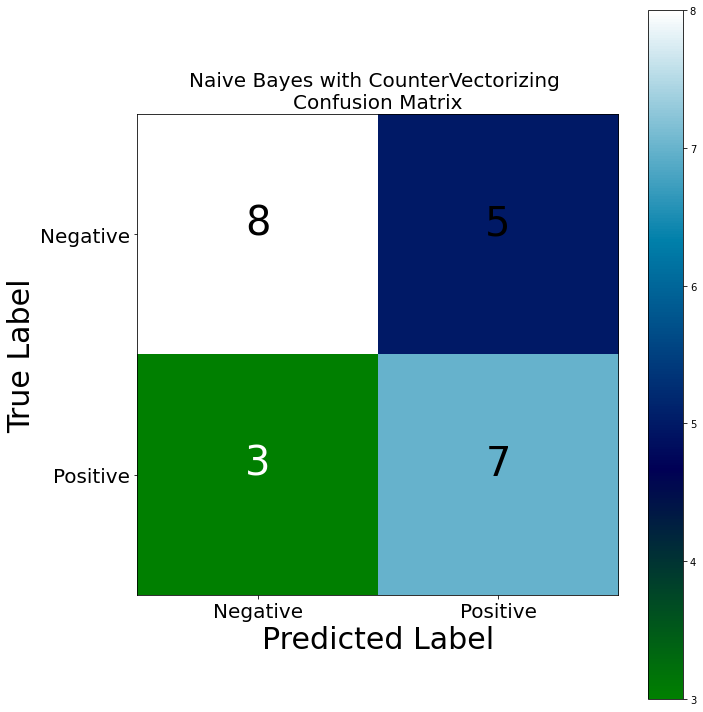

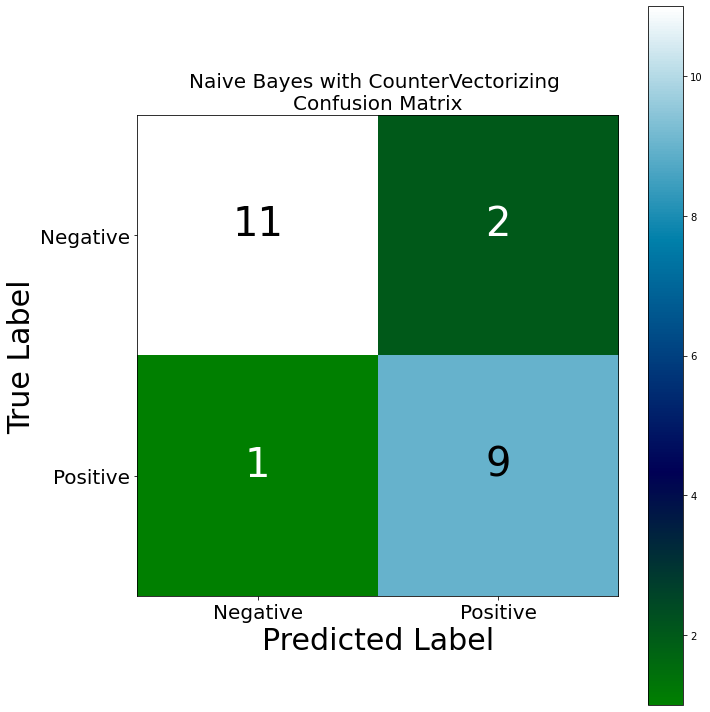

In [ ]:
#Created a confusion matrix for lie and sentiment
disp_confusion_matrix(y_pred_nb_lie,y_test_lie, "Naive Bayes","TF-IDF")
disp_confusion_matrix(y_pred_nb_senti,y_test_senti, "Naive Bayes","TF-IDF")

In [ ]:
#SVM

from sklearn.svm import SVC
#Hyper-parameter tuning for SVM

from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid_1= GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search
grid.fit(tfidf_vect_train,y_train_lie )
grid_1.fit(tfidf_vect_train,y_train_senti)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.538 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.538 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
#Creating a SVM Model with the best parameters
svc_lie=grid.best_estimator_
svc_senti=grid_1.best_estimator_

In [ ]:
y_pred_svm_lie = modeling(svc_lie,y_train_lie,y_test_lie, tfidf_vect_train, tfidf_vect_test)
y_pred_svm_senti= modeling(svc_senti,y_train_senti,y_test_senti, tfidf_vect_train, tfidf_vect_test)

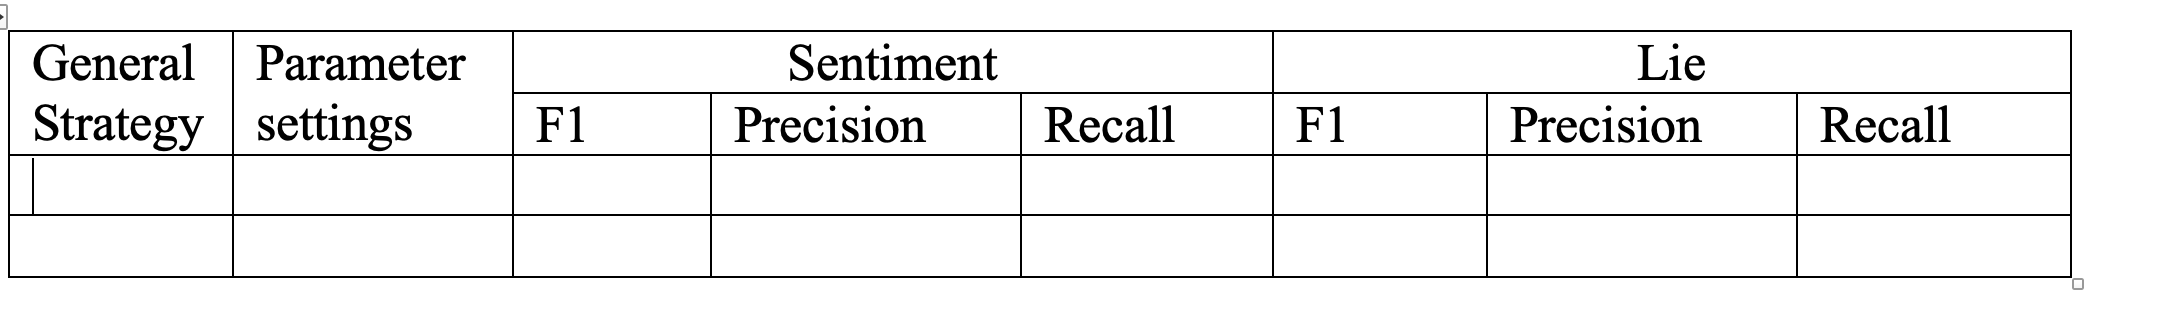

In [ ]:
print(classification_report(y_test_lie, y_pred_svm_lie))
print(classification_report(y_test_senti, y_pred_svm_senti))


#Classification Report for SVM:


#F1 score: 0.92

              precision    recall  f1-score   support

           f       0.67      0.62      0.64        13
           t       0.55      0.60      0.57        10

    accuracy                           0.61        23
   macro avg       0.61      0.61      0.61        23
weighted avg       0.61      0.61      0.61        23

              precision    recall  f1-score   support

           n       1.00      0.85      0.92        13
           p       0.83      1.00      0.91        10

    accuracy                           0.91        23
   macro avg       0.92      0.92      0.91        23
weighted avg       0.93      0.91      0.91        23



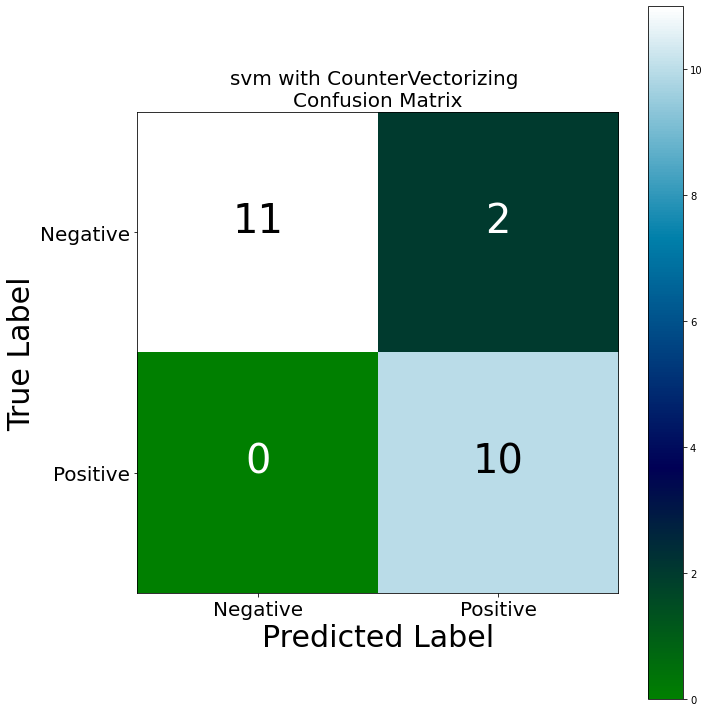

In [ ]:
disp_confusion_matrix(y_pred_svm_senti,y_test_senti, "svm","TF-IDF")

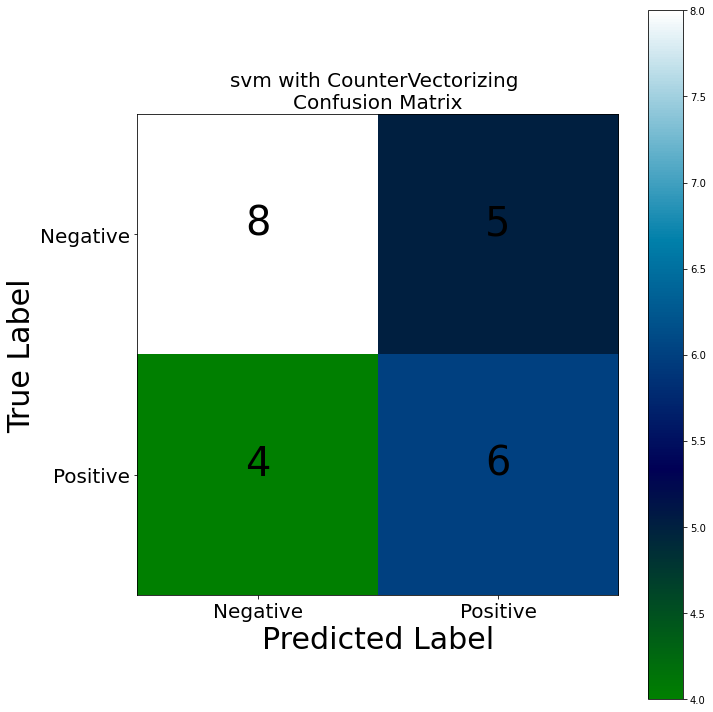

In [ ]:
disp_confusion_matrix(y_pred_svm_lie,y_test_lie, "svm","TF-IDF")


In this firstly I have pre processed the data because review data was very inconsistent and raw. I have performed special character removal, non ascii removal, lower casing, lemmtizing,tokenizing  and normalising to clean thee data. After cleaning the data I have converted the data to numerical format as machine learning algorithms don't take text as input,this was done using tfidf vectorizer. Lastly I have used svm and Naive Bayes supervised learning models to predict lie and sentiment seperately.
For the Naive Bayes algorithm I have done parameter tuning on alpha and found the best score for using that alpha and for svm I have used grid search cv to fine tune the model.

The results can be summarised as follows
Naive Bayes out performed Svm in lie detection with f1 score of 0.65 as compared to 0.61 but Svm out performed Naive Bayes in sentiment prediction. 
All the best parameter results are mentioned in the above cells for your verification.

